<a href="https://colab.research.google.com/github/dipakkumargupta/Dipak/blob/main/Copy_of_Zomato_Restaurant_Clustering_and_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Zomato Restaurant Clustering and Sentiment Analysis


##### **Project Type**    - EDA/Regression/Classification/Unsupervised
##### **Contribution**    - Group
##### **Dipak Gupta** & **Srijan Sahu** 

# Problem Statement

Zomato is an Indian restaurant aggregator and food delivery start-up founded by Deepinder Goyal and Pankaj Chaddah in 2008. Zomato provides information, menus and user-reviews of restaurants, and also has food delivery options from partner restaurants in select cities.

India is quite famous for its diverse multi cuisine available in a large number of restaurants and hotel resorts, which is reminiscent of unity in diversity. Restaurant business in India is always evolving. More Indians are warming up to the idea of eating restaurant food whether by dining outside or getting food delivered. The growing number of restaurants in every state of India has been a motivation to inspect the data to get some insights, interesting facts and figures about the Indian food industry in each city. So, this project focuses on analysing the Zomato restaurant data for each city in India.

The Project focuses on Customers and Company, you have to analyze the sentiments of the reviews given by the customer in the data and made some useful conclusion in the form of Visualizations. Also, cluster the zomato restaurants into different segments. The data is vizualized as it becomes easy to analyse data at instant. The Analysis also solve some of the business cases that can directly help the customers finding the Best restaurant in their locality and for the company to grow up and work on the fields they are currently lagging in.

This could help in clustering the restaurants into segments. Also the data has valuable information around cuisine and costing which can be used in cost vs. benefit analysis

Data could be used for sentiment analysis. Also the metadata of reviewers can be used for identifying the critics in the industry.

# Github Link

Link

# Data Understanding

## Zomato Restaurant names and Metadata
Use this dataset for clustering part

1. Name : Name of Restaurants
2. Links : URL Links of Restaurants
3. Cost : Per person estimated Cost of dining
4. Collection : Tagging of Restaurants w.r.t. Zomato categories
5. Cuisines : Cuisines served by Restaurants
6. Timings : Restaurant Timings

## Zomato Restaurant reviews
Merge this dataset with Names and Metadata and then use for sentiment analysis part

1. Restaurant : Name of the Restaurant
2. Reviewer : Name of the Reviewer
3. Review : Review Text
4. Rating : Rating Provided by Reviewer
5. MetaData : Reviewer Metadata - No. of Reviews and followers
6. Time: Date and Time of Review
7. Pictures : No. of pictures posted with review

# Importing the required libraries

In [ ]:
# Importing the required libraries

# For Data Loading and Numerical Operations
import pandas as pd
import numpy as np

# For Data Visualizations
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# For Text Preprocessing
import string
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')
import re
from nltk.stem import WordNetLemmatizer
from nltk import pos_tag
from nltk.corpus import wordnet


# For Visualising and Analysing Words
from wordcloud import WordCloud
from nltk.corpus import stopwords

# For Sentiment Analysis
from textblob import TextBlob
from sklearn.feature_extraction.text import TfidfVectorizer

# For Data Splitting
from sklearn.model_selection import train_test_split

# For Data Modelling
from sklearn.linear_model import LogisticRegression

# For Encoding, Scaling and Clustering
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# For Transformation
!pip install pipeline
from sklearn.pipeline import Pipeline

# For Metrics Evaluation
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score

# Remove Warnings
import warnings
warnings.filterwarnings("ignore")


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Data Loading

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Loading the  data File

# Zomato Restaurant Names and Metadata
df1 = pd.read_csv("/content/drive/MyDrive/Zomato Project/Zomato Restaurant names and Metadata.csv")

# Zomato Restaurant Reviews
df2 = pd.read_csv("/content/drive/MyDrive/Zomato Project/Zomato Restaurant reviews.csv")

# Exploratory Data Analysis

## Zomato Restaurant Names and Metadata

In [ ]:
# Display the First 5 Rows
df1.head()

,Name,Links,Cost,Collections,Cuisines,Timings
0,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)"
1,Paradise,https://www.zomato.com/hyderabad/paradise-gach...,800,Hyderabad's Hottest,"Biryani, North Indian, Chinese",11 AM to 11 PM
2,Flechazo,https://www.zomato.com/hyderabad/flechazo-gach...,"1,300","Great Buffets, Hyderabad's Hottest","Asian, Mediterranean, North Indian, Desserts","11:30 AM to 4:30 PM, 6:30 PM to 11 PM"
3,Shah Ghouse Hotel & Restaurant,https://www.zomato.com/hyderabad/shah-ghouse-h...,800,Late Night Restaurants,"Biryani, North Indian, Chinese, Seafood, Bever...",12 Noon to 2 AM
4,Over The Moon Brew Company,https://www.zomato.com/hyderabad/over-the-moon...,"1,200","Best Bars & Pubs, Food Hygiene Rated Restauran...","Asian, Continental, North Indian, Chinese, Med...","12noon to 11pm (Mon, Tue, Wed, Thu, Sun), 12no..."


In [ ]:
# Shape of Dataset
df1.shape

(105, 6)

In [ ]:
# Number of Rows and Columns 
print("Rows    : ",df1.shape[0])
print("Columns : ",df1.shape[1])

Rows    :  105
Columns :  6


In [ ]:
# Printing the Feature List
print("Features : \n",df1.columns.tolist())

Features : 
 ['Name', 'Links', 'Cost', 'Collections', 'Cuisines', 'Timings']


In [ ]:
# Getting the information about Dataset
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         105 non-null    object
 1   Links        105 non-null    object
 2   Cost         105 non-null    object
 3   Collections  51 non-null     object
 4   Cuisines     105 non-null    object
 5   Timings      104 non-null    object
dtypes: object(6)
memory usage: 5.0+ KB


Now We are going to drop the 'Links' and 'Timings' columns as we are not using for further analysis.

In [ ]:
# Making Copy of Original Dataset
dff1 = df1.copy()

# Dropping the Links and Columns columns
dff1.drop(['Links','Timings'], axis = 1, inplace = True)
dff1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         105 non-null    object
 1   Cost         105 non-null    object
 2   Collections  51 non-null     object
 3   Cuisines     105 non-null    object
dtypes: object(4)
memory usage: 3.4+ KB


### Handling Missing Values

In [ ]:
# Null Values
dff1.isnull().sum()

Name            0
Cost            0
Collections    54
Cuisines        0
dtype: int64

In [ ]:
# Checking the Duplicate Values
duplicate1 = dff1.duplicated().sum()

From the above calcuations we can assume that there is 54 missing values in 'Collection' Features and No Duplicate values in Dataset

In [ ]:
# Dropping the collection column as it have more missing values
dff1.drop("Collections", axis = 1, inplace = True)
dff1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Name      105 non-null    object
 1   Cost      105 non-null    object
 2   Cuisines  105 non-null    object
dtypes: object(3)
memory usage: 2.6+ KB


In [ ]:
# Converting String Variables into float Variables
dff1['Cost'] = dff1['Cost'].str.replace(',','').apply(float)

### Descriptive Statistics

In [ ]:
# Generating descriptive ffunction of Dataset
dff1.describe()

,Cost
count,105.000000
mean,861.428571
std,510.149730
min,150.000000
25%,500.000000
50%,700.000000
75%,1200.000000
max,2800.000000


Outcomes:
1. Average per person estimated cost of dining for Zomato restaurants is 861.428571
2. Minimum and Maximum estimated cost per person is 105 and 2800

### Top 20 Cuisines in Demand

In [ ]:
# Extracting all the cuisines
cuisine = pd.Series([ele.strip() for cuis_str in dff1['Cuisines'] for ele in cuis_str.split(',')])

In [ ]:
# Unique Cuisines
print(f"Total Value of Cuisines are {cuisine.unique()}.")
print("Unique Cuisines: \n", cuisine.unique())

Total Value of Cuisines are ['Chinese' 'Continental' 'Kebab' 'European' 'South Indian' 'North Indian'
 'Biryani' 'Asian' 'Mediterranean' 'Desserts' 'Seafood' 'Beverages' 'Goan'
 'Healthy Food' 'Lebanese' 'American' 'Ice Cream' 'Street Food'
 'Fast Food' 'BBQ' 'Italian' 'Finger Food' 'Burger' 'Japanese' 'Salad'
 'Sushi' 'Mexican' 'Mughlai' 'Andhra' 'Bakery' 'Juices' 'Arabian'
 'Hyderabadi' 'Cafe' 'Spanish' 'Wraps' 'Thai' 'Indonesian' 'Modern Indian'
 'Momos' 'Pizza' 'North Eastern' 'Mithai' 'Malaysian'].
Unique Cuisines: 
 ['Chinese' 'Continental' 'Kebab' 'European' 'South Indian' 'North Indian'
 'Biryani' 'Asian' 'Mediterranean' 'Desserts' 'Seafood' 'Beverages' 'Goan'
 'Healthy Food' 'Lebanese' 'American' 'Ice Cream' 'Street Food'
 'Fast Food' 'BBQ' 'Italian' 'Finger Food' 'Burger' 'Japanese' 'Salad'
 'Sushi' 'Mexican' 'Mughlai' 'Andhra' 'Bakery' 'Juices' 'Arabian'
 'Hyderabadi' 'Cafe' 'Spanish' 'Wraps' 'Thai' 'Indonesian' 'Modern Indian'
 'Momos' 'Pizza' 'North Eastern' 'Mithai' 'Mala

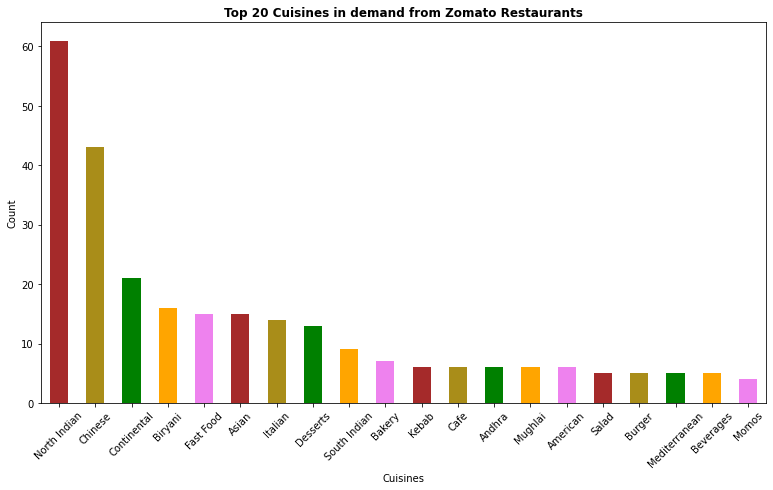

In [ ]:
# Visualizing top 20 cuisines

plt.figure(figsize=(13, 7))

# Using Bar Chart to Display 
cuisine.value_counts()[:20].plot(kind = 'bar', 
                                color = ['brown', '#a98d19', 'green', 'orange', 'violet'])

#To display the x label, y label and title of the bar chart
plt.xlabel('Cuisines')
plt.ylabel('Count')
plt.title('Top 20 Cuisines in demand from Zomato Restaurants', weight='bold')

#setting xticks
plt.xticks(rotation = 45)

plt.show()


Outcomes:
1. North Indian is most commonly offered cuisines
2. Momos is the last most preffered cuisine

### Cuisines Distributions accoding to cost

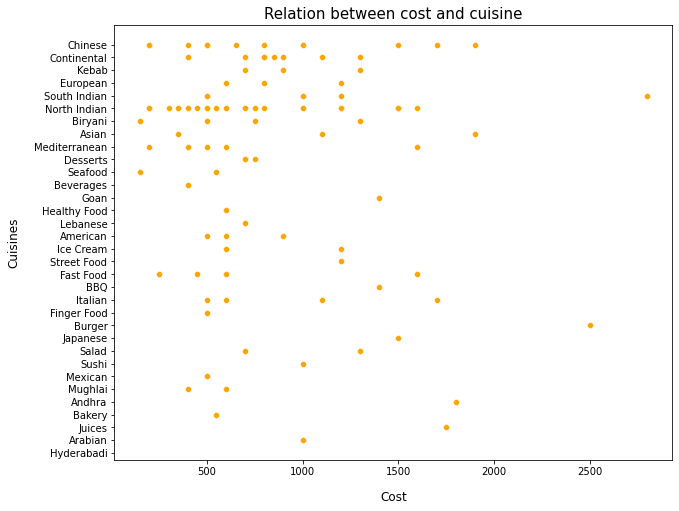

In [ ]:
# Checking relition beetween Cost and Cuisines
# Creating Box Plot
fig = plt.figure(figsize=(10,8))
sns.scatterplot(y= cuisine, x = dff1['Cost'], color='orange')
plt.xlabel("Cost", labelpad=14, fontsize = 12)
plt.ylabel("Cuisines", labelpad=14, fontsize = 12)
plt.title("Relation between cost and cuisine", fontsize = 15)
plt.show()

Outcomes:
1. North Indian Food has wide Price Range
2. Arabian Food has least Price Range

## Zomato Restaurants Review

In [ ]:
# Displaying First 5 Rows
df2.head()

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5,"1 Review , 2 Followers",5/25/2019 15:54,0
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5,"3 Reviews , 2 Followers",5/25/2019 14:20,0
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5,"2 Reviews , 3 Followers",5/24/2019 22:54,0
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5,"1 Review , 1 Follower",5/24/2019 22:11,0
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5,"3 Reviews , 2 Followers",5/24/2019 21:37,0


In [ ]:
# Shape of the Dataset
df1.shape

(105, 6)

In [ ]:
# Printing the Rows And Columns of Dataset
print ("Rows    : " ,df2.shape[0])
print ("Columns : " ,df2.shape[1])

Rows    :  10000
Columns :  7


In [ ]:
# Getting the Info of the Dataset
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Restaurant  10000 non-null  object
 1   Reviewer    9962 non-null   object
 2   Review      9955 non-null   object
 3   Rating      9962 non-null   object
 4   Metadata    9962 non-null   object
 5   Time        9962 non-null   object
 6   Pictures    10000 non-null  int64 
dtypes: int64(1), object(6)
memory usage: 547.0+ KB


### Handling the Missing Values

In [ ]:
# Checking the Null Values
df2.isnull().sum()

Restaurant     0
Reviewer      38
Review        45
Rating        38
Metadata      38
Time          38
Pictures       0
dtype: int64

In [ ]:
# Calculating missing Features of Null Values in Dataset
per_value = (df2.isnull().sum()/len(df2))*100
per_value.round(2)

Restaurant    0.00
Reviewer      0.38
Review        0.45
Rating        0.38
Metadata      0.38
Time          0.38
Pictures      0.00
dtype: float64

Outcomes: 
1. Total 197 missing values in Dataframe.
2. As the missing percentages are low, we will be dropping null values from these columns.

In [ ]:
# Making copy of Dataset For further Analysis
dff2 = df2.copy()

In [ ]:
# Dropping all other Rows having Null Values
dff2.dropna(inplace = True)
dff2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9955 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Restaurant  9955 non-null   object
 1   Reviewer    9955 non-null   object
 2   Review      9955 non-null   object
 3   Rating      9955 non-null   object
 4   Metadata    9955 non-null   object
 5   Time        9955 non-null   object
 6   Pictures    9955 non-null   int64 
dtypes: int64(1), object(6)
memory usage: 622.2+ KB


In [ ]:
# Checking the Duplicate Values
dff2.duplicated().sum()

0

Outcome:

From the above we can see that there is no duplicate values

In [ ]:
# Checking the Unique Values in the Columns
print("Unique values :\n",dff2.nunique())

Unique values :
 Restaurant     100
Reviewer      7442
Review        9364
Rating          10
Metadata      2477
Time          9775
Pictures        36
dtype: int64


In [ ]:
# UNique Rating in Dataset
print("Unique ratings: \n",dff2["Rating"].unique())

Unique ratings: 
 ['5' '4' '1' '3' '2' '3.5' '4.5' '2.5' '1.5' 'Like']


In [ ]:
# Checking Observation with Rating = Like
dff2[dff2['Rating'].isin(['Like'])]

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures
7601,The Old Madras Baking Company,Dhanasekar Kannan,One of the best pizzas to try. It served with ...,Like,"12 Reviews , 21 Followers",5/18/2019 12:31,1


As there is only 1 observation with Rating = 'Like', we will be replacing it with rating of 5.

In [ ]:
# Changing 'like' as rating of 5 and converting string variable into float variable
dff2['Rating'] = dff2['Rating'].replace('Like', '5').apply(float)
dff2['Rating'].unique()

array([5. , 4. , 1. , 3. , 2. , 3.5, 4.5, 2.5, 1.5])

### Descriptive Statistics

In [ ]:
# Describing the Data
dff2.describe()

,Rating,Pictures
count,9955.000000,9955.000000
mean,3.600402,0.751984
std,1.483565,2.575691
min,1.000000,0.000000
25%,3.000000,0.000000
50%,4.000000,0.000000
75%,5.000000,0.000000
max,5.000000,64.000000


### Zomato Restaurants Distribution based on Ratings

In [ ]:
dff2['Rating'].value_counts()

5.0    3827
4.0    2373
1.0    1735
3.0    1192
2.0     684
4.5      69
3.5      47
2.5      19
1.5       9
Name: Rating, dtype: int64

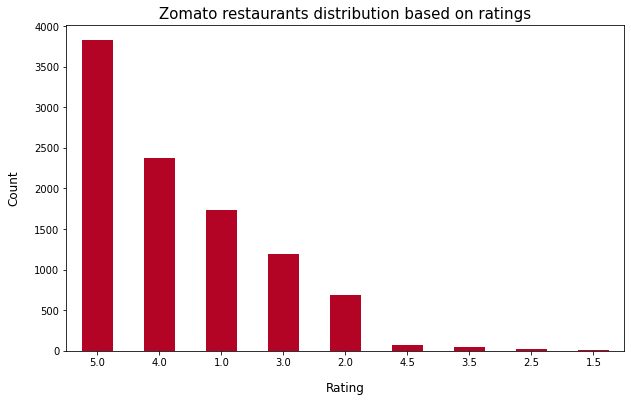

In [ ]:
# Using Bar PLots for Representation
dff2['Rating'].value_counts().plot(kind='bar', colormap='coolwarm_r', figsize=(10, 6))

# To Display x Labels , y Labels and Title of the Bar Chart
plt.xlabel("Rating", labelpad=14, fontsize = 12)
plt.ylabel("Count", labelpad=14, fontsize = 12)
plt.title("Zomato restaurants distribution based on ratings", fontsize = 15)
plt.xticks(rotation = 0)
plt.show()

Outcomes:
1. Very few Restaurants have less Ratings
2. Most of restaurants have 5 rating
3. Few customers have given specific Ratings

### Top 10 Zomato Restaurants Based on Average Ratings

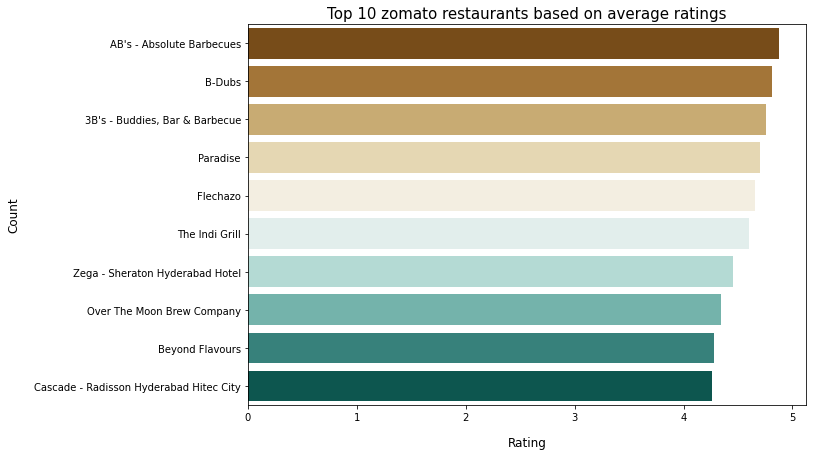

In [ ]:
# Setting the Figure size
plt.figure(figsize = (10,7))

# Creating the data to use for Data Visualization
data = dff2.groupby('Restaurant')['Rating'].mean().reset_index().sort_values(by='Rating', ascending=False)

# Using Bar PLot to Display
sns.barplot(y = data.head(10)['Restaurant'], x = data.head(10)['Rating'], palette="BrBG")

##To display the x label, y label and title of the bar chart
plt.xlabel("Rating", labelpad=14, fontsize = 12)
plt.ylabel("Count", labelpad=14, fontsize = 12)
plt.title("Top 10 zomato restaurants based on average ratings", fontsize = 15)
plt.show()

Outcomes:
1. AB's Absolute Barbecues has Highest Ratings.
2. B-Dubs is the 2nd Most rated Restaurants

# Merging the Two Dataset - Feature Engineering 




In [ ]:
# Merging the Two Dataset
dff2.rename(columns = {'Restaurant' : 'Name'}, inplace = True)

In [ ]:
zomato_df = pd.merge(dff1, dff2, on = 'Name')

In [ ]:
# Displaying the First Five Rows
zomato_df.head()

,Name,Cost,Cuisines,Reviewer,Review,Rating,Metadata,Time,Pictures
0,Beyond Flavours,800.0,"Chinese, Continental, Kebab, European, South I...",Rusha Chakraborty,"The ambience was good, food was quite good . h...",5.0,"1 Review , 2 Followers",5/25/2019 15:54,0
1,Beyond Flavours,800.0,"Chinese, Continental, Kebab, European, South I...",Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5.0,"3 Reviews , 2 Followers",5/25/2019 14:20,0
2,Beyond Flavours,800.0,"Chinese, Continental, Kebab, European, South I...",Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5.0,"2 Reviews , 3 Followers",5/24/2019 22:54,0
3,Beyond Flavours,800.0,"Chinese, Continental, Kebab, European, South I...",Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5.0,"1 Review , 1 Follower",5/24/2019 22:11,0
4,Beyond Flavours,800.0,"Chinese, Continental, Kebab, European, South I...",Dileep,Food is good.we ordered Kodi drumsticks and ba...,5.0,"3 Reviews , 2 Followers",5/24/2019 21:37,0


In [ ]:
# Shape of Dataset
zomato_df.shape

(9955, 9)

In [ ]:
# Printing Rows and Columns of Dataset
print ("Rows    : " ,zomato_df.shape[0])
print ("Columns : " ,zomato_df.shape[1])

Rows    :  9955
Columns :  9


In [ ]:
# Getting the info of the Dataset
zomato_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9955 entries, 0 to 9954
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      9955 non-null   object 
 1   Cost      9955 non-null   float64
 2   Cuisines  9955 non-null   object 
 3   Reviewer  9955 non-null   object 
 4   Review    9955 non-null   object 
 5   Rating    9955 non-null   float64
 6   Metadata  9955 non-null   object 
 7   Time      9955 non-null   object 
 8   Pictures  9955 non-null   int64  
dtypes: float64(2), int64(1), object(6)
memory usage: 777.7+ KB


As per the Analysis we can confirm that there is no Missing Values

### Top 10 Expensive Restaurants

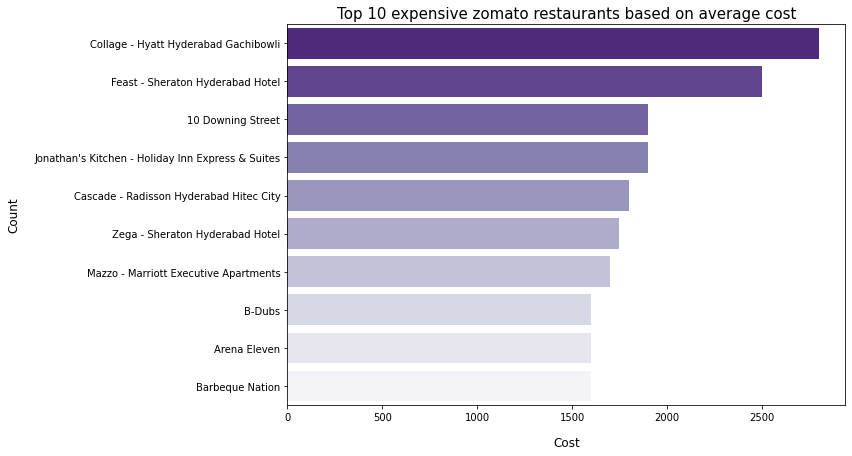

In [ ]:
#setting figure size
plt.figure(figsize = (10,7))

#creating data to use for visualization
data = zomato_df.groupby('Name')['Cost'].mean().reset_index().sort_values(by='Cost', ascending=False)

#Bar plot to display top 10 expensive zomato restaurants based on average ratings
sns.barplot(y = data.head(10)['Name'], x = data.head(10)['Cost'], palette = 'Purples_r')

#To display the x label, y label and title of the bar chart
plt.xlabel("Cost", labelpad=14, fontsize = 12)
plt.ylabel("Count", labelpad=14, fontsize = 12)
plt.title("Top 10 expensive zomato restaurants based on average cost", fontsize = 15)
plt.show()

Outcomes:
1. As per the Analysis Collage - Hyaat Hyderabad Gachibowli is most expensive
2. 10 Downing street is the third most Expensive Gift

### Top 10 Reviewers on an Average

In [ ]:
# Creating Columns to Display Number of Reviews given by Paticular Reviewers
zomato_df['Num_of_reviews'] = zomato_df.Metadata.apply(lambda x: (x.split()[0])).astype('float')
zomato_df[['Reviewer', 'Num_of_reviews']]

,Reviewer,Num_of_reviews
0,Rusha Chakraborty,1.0
1,Anusha Tirumalaneedi,3.0
2,Ashok Shekhawat,2.0
3,Swapnil Sarkar,1.0
4,Dileep,3.0
...,...,...
9950,Abhishek Mahajan,53.0
9951,Sharad Agrawal,2.0
9952,Ramandeep,65.0
9953,Nayana Shanbhag,13.0


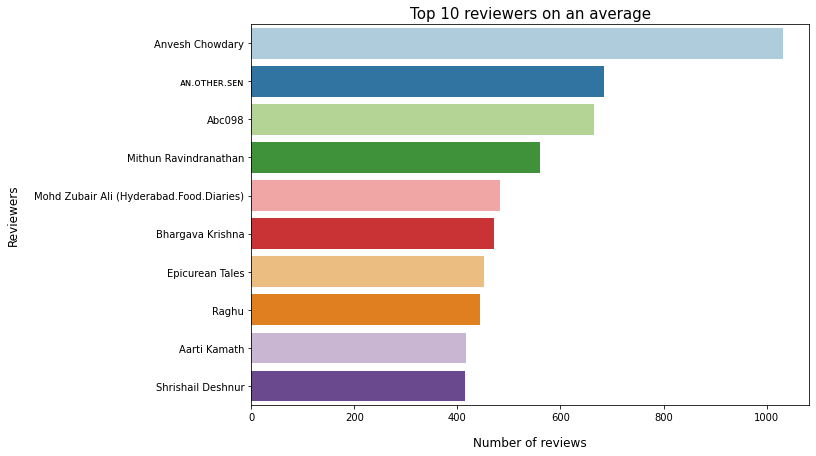

In [ ]:
# Setting figure size
plt.figure(figsize = (10,7))

# Creating data to use for visualization
data = zomato_df.groupby('Reviewer')['Num_of_reviews'].mean().reset_index().sort_values(by='Num_of_reviews', ascending=False)

# Bar plot to display top 10 reviewers
sns.barplot(y = data.head(10)['Reviewer'], 
            x = data.head(10)['Num_of_reviews'], palette = 'Paired')

# To display the x label, y label and title of the bar chart
plt.xlabel("Number of reviews", labelpad=14, fontsize = 12)
plt.ylabel("Reviewers", labelpad=14, fontsize = 12)
plt.title("Top 10 reviewers on an average", fontsize = 15)
plt.show()

Outcome:
1. Anvesh Chowdary is is the top Reviewer.
2. Only Anvesh is the one having Reviewers more than 1000.

### Top 10 Affordable Zomato Restaurants

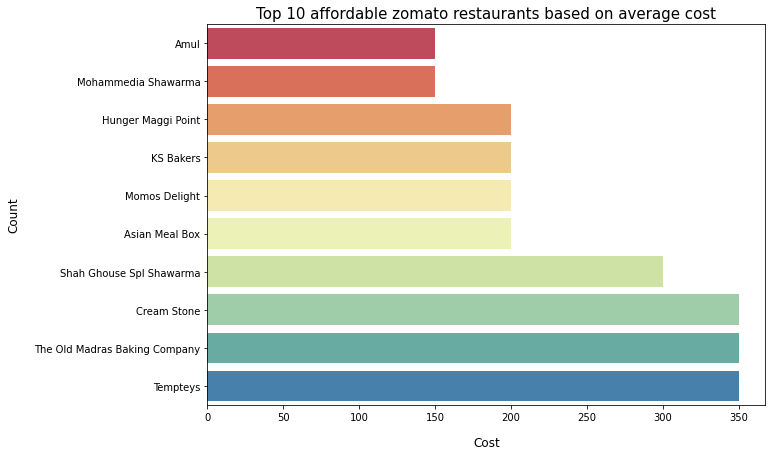

In [ ]:
# Setting figure size
plt.figure(figsize = (10,7))

# Creating data to use for visualization
data = zomato_df.groupby('Name')['Cost'].mean().reset_index().sort_values(by='Cost')

# Bar plot to display top 10 cheap zomato restaurants based on average ratings
sns.barplot(y = data.head(10)['Name'], x = data.head(10)['Cost'], palette = 'Spectral')

# To display the x label, y label and title of the bar chart
plt.xlabel("Cost", labelpad=14, fontsize = 12)
plt.ylabel("Count", labelpad=14, fontsize = 12)
plt.title("Top 10 affordable zomato restaurants based on average cost", fontsize = 15)
plt.show()

Outcomes:
1. Amul is the most affordable restaurants
2. Only 6 restaurants have cost less than or equal to 200

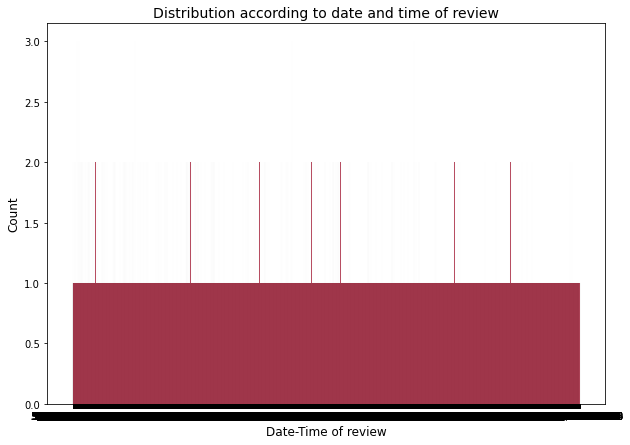

In [ ]:
#setting figure size
plt.figure(figsize=(10,7))

#histogram plot for time distribution
sns.histplot(zomato_df['Time'], color = '#A2142F')    

#To display x label, y label and the title of the bar chart
plt.xlabel('Date-Time of review', fontsize = 12)
plt.ylabel('Count', fontsize = 12)
plt.title('Distribution according to date and time of review', fontsize = 14) 
plt.show()

### Most Famous Zomato Restaurant using Word Cloud

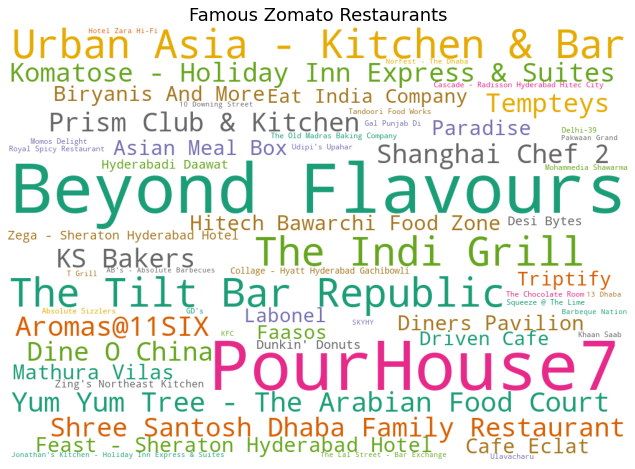

In [ ]:
# Setting Figure Size
fig = plt.figure(1,figsize=(12,8))

wordcloud = (WordCloud(width = 1000, height = 700, background_color = 'white', random_state = 1, prefer_horizontal = 2,
                       colormap = 'Dark2', max_words = 60).generate_from_frequencies(zomato_df.Name.value_counts()))

# Plot the word cloud Image
plt.imshow(wordcloud)
plt.axis('off')

# To display the title of the word cloud
plt.title("Famous Zomato Restaurants", fontsize = 18)
plt.show()

Outcome :
1. Beyond Flavours and PourHouse 7 are most famous zomato Restaurants.

According to my hypothesis :
1. Zomato Should collaborate with more famous restaurants like Beyond Flavours and PourHouse7 to increase Popularity.



### Customer Reviews with Word Cloud

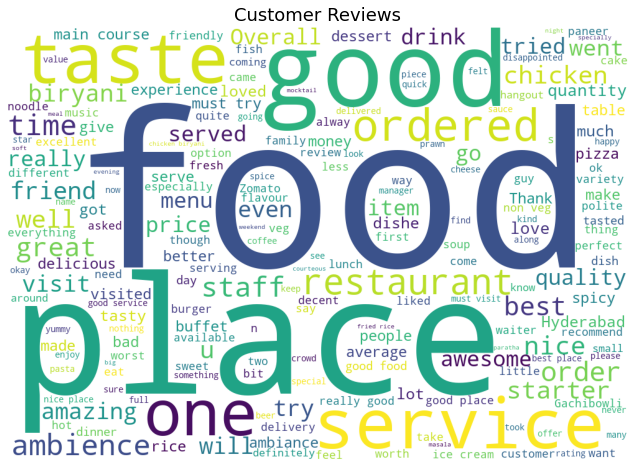

In [ ]:
#setting figure size
plt.figure(figsize = (12, 8)) 

#join all reviews  
text = ' '.join(zomato_df.Review)

#To generate an image that gives us the most representative words 
wordcloud = WordCloud(width = 1000, height = 700,      
                      prefer_horizontal = 2, random_state = 2, 
                      background_color = 'white').generate(text) 
  
#plot the WordCloud image                        
plt.imshow(wordcloud) 
plt.axis("off") 

#To display the title of the word cloud
plt.title('Customer Reviews', fontsize = 18)
plt.show()

Inference:

Popular words in zomato restaurants reviews are food and place.
According to my hypothesis:

Customers are generally giving reviews on the basis of food, place, taste, service, and ambience.

### Most Popular Cusines in Zomato Restaurants using Word Cloud

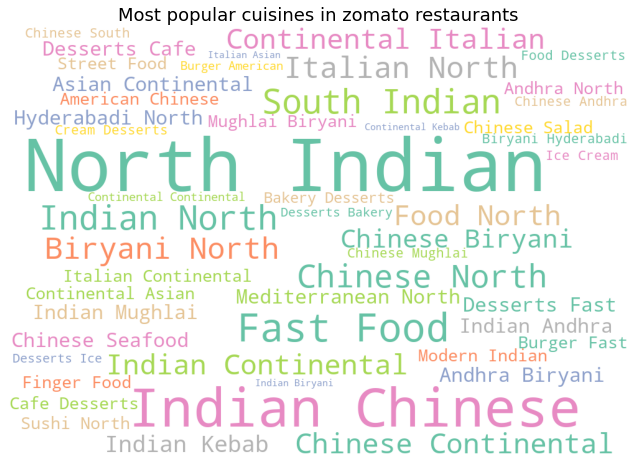

In [ ]:
#setting figure size
plt.figure(figsize = (12, 8)) 

#join all cuisines  
text = ' '.join(zomato_df.Cuisines)

#To generate an image that gives us the most representative words 
wordcloud = WordCloud(width = 1000, height = 700, random_state = 1,
                      prefer_horizontal = 2, max_words = 50, colormap = 'Set2',              
                      background_color ='white').generate(text) 
  
#plot the WordCloud image                        
plt.imshow(wordcloud) 
plt.axis("off") 

#To display the title of the word cloud
plt.title('Most popular cuisines in zomato restaurants', fontsize = 18)
plt.show()

Inference:

Most popular cuisines in zomato restaurants are North Indian and Indian Chinese.
According to my hypothesis:

Zomato can suggest its restaurants to include North Indian and Indian Chinese in their cuisine to gain more orders.

### **Checking frequency distribution of all data using histogram**

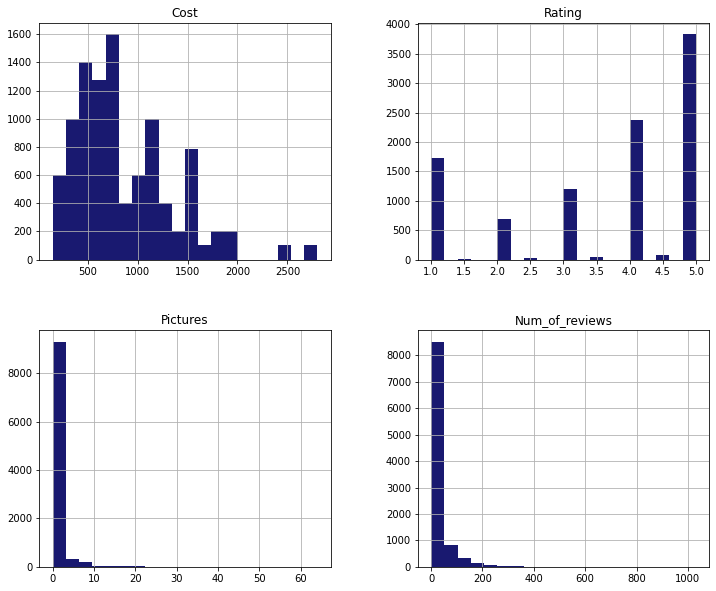

In [ ]:
#Frequency distribution of variables to visualize their distribution
zomato_df.hist(bins = 20 , color = "midnightblue", figsize = (12,10))
plt.show()

Inference:

1. All variables shows irregular distribution except "Pictures" and "Num_of_reviews".

2. "Pictures" and "Num_of_reviews" are positively skewed.


###  **Drawing heat map to compare the correlation between features**

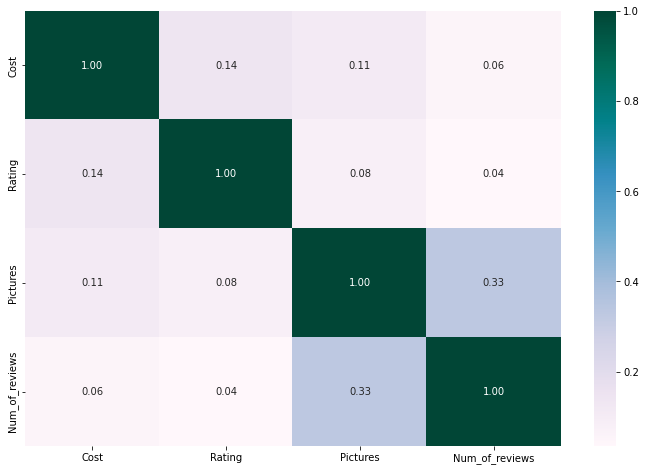

In [ ]:
#Drawing heat map to compare the correlation between features

#setting figure size
plt.figure(figsize = (12,8))

#creating heatmap
corr = zomato_df.corr()
sns.heatmap(corr, cmap = 'PuBuGn', annot = True, fmt = '.2f')
plt.show()

Inference:

1. All variables are positively correlated with each other. 
2. None of the variable are highly correlated with each other.

Clustering And Sentiment Analysis

# Clustering

In [ ]:
# Dropping Some of the columns which will not used in the Clustering and Sentiment 
zomato_df.drop(['Reviewer', 'Metadata', 'Pictures', 'Num_of_reviews'], axis=1, inplace = True)
zomato_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9955 entries, 0 to 9954
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      9955 non-null   object 
 1   Cost      9955 non-null   float64
 2   Cuisines  9955 non-null   object 
 3   Review    9955 non-null   object 
 4   Rating    9955 non-null   float64
 5   Time      9955 non-null   object 
dtypes: float64(2), object(4)
memory usage: 544.4+ KB


In [ ]:
#converting string of cuisines to list of cuisines
dff1['Cuisines'] = dff1['Cuisines'].str.replace(' ','').str.split(',')
dff1['Cuisines']

0      [Chinese, Continental, Kebab, European, SouthI...
1                        [Biryani, NorthIndian, Chinese]
2          [Asian, Mediterranean, NorthIndian, Desserts]
3      [Biryani, NorthIndian, Chinese, Seafood, Bever...
4      [Asian, Continental, NorthIndian, Chinese, Med...
                             ...                        
100                                    [FastFood, Salad]
101                                     [Bakery, Mithai]
102                      [NorthIndian, Biryani, Chinese]
103                                           [FastFood]
104                    [Thai, Asian, Chinese, Malaysian]
Name: Cuisines, Length: 105, dtype: object

In [ ]:
#encoding multiple labels per instance
mlb = MultiLabelBinarizer(sparse_output=True)

#Creating a dataFrame from a scipy sparse matrix
dff1 = dff1.join(pd.DataFrame.sparse.from_spmatrix(mlb.fit_transform(dff1.pop('Cuisines')),
                                                               index = dff1.index, columns=mlb.classes_))
#To see all columns 
pd.set_option('display.max_columns', None)

#Displays the first five rows of the dataset
dff1.head()

,Name,Cost,American,Andhra,Arabian,Asian,BBQ,Bakery,Beverages,Biryani,Burger,Cafe,Chinese,Continental,Desserts,European,FastFood,FingerFood,Goan,HealthyFood,Hyderabadi,IceCream,Indonesian,Italian,Japanese,Juices,Kebab,Lebanese,Malaysian,Mediterranean,Mexican,Mithai,ModernIndian,Momos,Mughlai,NorthEastern,NorthIndian,Pizza,Salad,Seafood,SouthIndian,Spanish,StreetFood,Sushi,Thai,Wraps
0,Beyond Flavours,800.0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
1,Paradise,800.0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,Flechazo,1300.0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,Shah Ghouse Hotel & Restaurant,800.0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0
4,Over The Moon Brew Company,1200.0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


In [ ]:
#creating dataset for training
X = dff1[list(dff1.columns)]

#Transforming the data
scaler = StandardScaler()
scaler.fit_transform(X.iloc[:, 1:])
X.shape

(105, 46)

### K-Means Clustering

Selecting the number of Clusters

In [ ]:
#within cluster sum of squares
wcss = []

#using 'for' loop for storing wcss values in the empty list created above
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, random_state = 0)
    kmeans.fit(X.iloc[:, 1:])
    wcss.append(kmeans.inertia_)

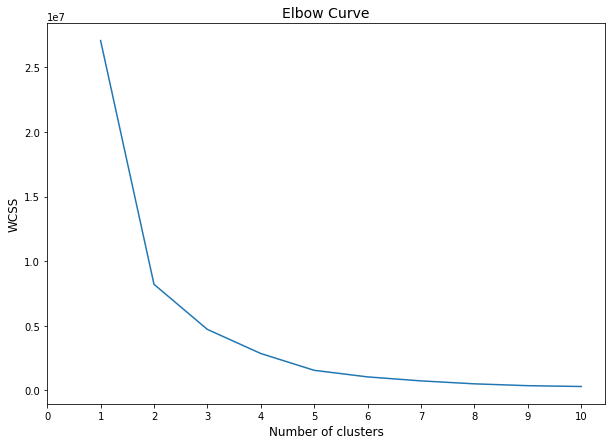

In [ ]:
#setting figure size
plt.figure(figsize=(10,7))

#Plotting elbow curve for selecting the value of k
plt.plot(range(1, 11), wcss)

#To display the x label, y label, title and xticks 
plt.xlabel('Number of clusters', fontsize = 12)
plt.ylabel('WCSS', fontsize = 12)
plt.title('Elbow Curve', fontsize = 14) 
plt.xticks(ticks = list(range(0, 11)))
plt.show()

From the above elbow curve,

Number of clusters = 5

In [ ]:
#creating base model
kmeans = KMeans(n_clusters = 5, random_state = 0)

#fitting the model to the dataset
kmeans.fit(X.iloc[:, 1:])

KMeans(n_clusters=5, random_state=0)

In [ ]:
#Predicting the closest cluster each sample in X belongs to
y_cluster = kmeans.predict(X.iloc[:, 1:])
y_cluster

array([0, 0, 1, 0, 1, 4, 3, 3, 1, 3, 3, 4, 0, 1, 4, 3, 3, 3, 4, 3, 3, 4,
       4, 3, 4, 1, 1, 1, 0, 3, 0, 1, 0, 0, 4, 0, 0, 3, 1, 0, 1, 3, 0, 3,
       1, 0, 4, 0, 3, 3, 0, 3, 3, 1, 3, 0, 2, 3, 3, 3, 1, 1, 3, 0, 0, 4,
       0, 1, 4, 4, 1, 1, 1, 0, 0, 0, 3, 0, 1, 0, 3, 0, 0, 3, 0, 3, 0, 0,
       3, 3, 4, 4, 2, 3, 3, 3, 0, 4, 3, 1, 0, 3, 3, 3, 4], dtype=int32)

In [ ]:
#unique clusters with its count
np.unique(y_cluster, return_counts = True)

(array([0, 1, 2, 3, 4], dtype=int32), array([31, 20,  2, 36, 16]))

In [ ]:
#Creating an array
x = np.array(X)

### Cluster of Restaurants Based on Price



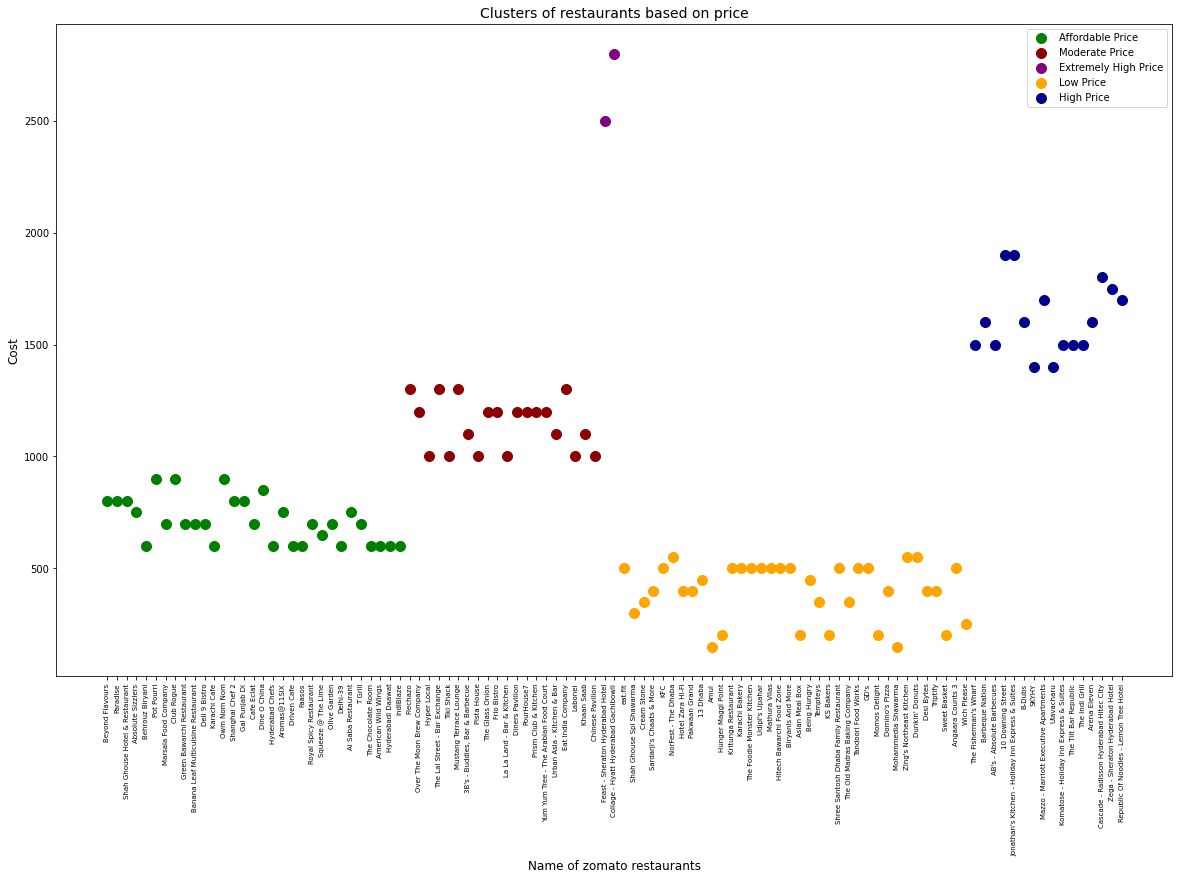

In [ ]:
#setting figure size
plt.figure(figsize=(20, 12))  

#Visualizing the clusters
plt.scatter(x[y_cluster == 0, 0], x[y_cluster == 0, 1], s = 100, c = 'green', label = 'Affordable Price')
plt.scatter(x[y_cluster == 1, 0], x[y_cluster == 1, 1], s = 100, c = 'darkred', label = 'Moderate Price')
plt.scatter(x[y_cluster == 2, 0], x[y_cluster == 2, 1], s = 100, c = 'purple', label = 'Extremely High Price')
plt.scatter(x[y_cluster == 3, 0], x[y_cluster == 3, 1], s = 100, c = 'orange', label = 'Low Price')
plt.scatter(x[y_cluster == 4, 0], x[y_cluster == 4, 1], s = 100, c = 'darkblue', label = 'High Price')

#To display the x label, y label, title and xticks 
plt.title('Clusters of restaurants based on price', fontsize = 14)
plt.xlabel('Name of zomato restaurants', fontsize = 12)
plt.ylabel('Cost', fontsize = 12)
plt.xticks(fontsize=7, rotation = 90)
plt.legend()
plt.show()

Inference:

1. From the above cluster distribution, restaurants with a low price have the largest cluster, and restaurants with an extremely high price have the smallest cluster.

According to my hypothesis:

1. Zomato restaurants that have a low and affordable cost per person are in more demand.


### Cluster of Number of Cuisines and Cost

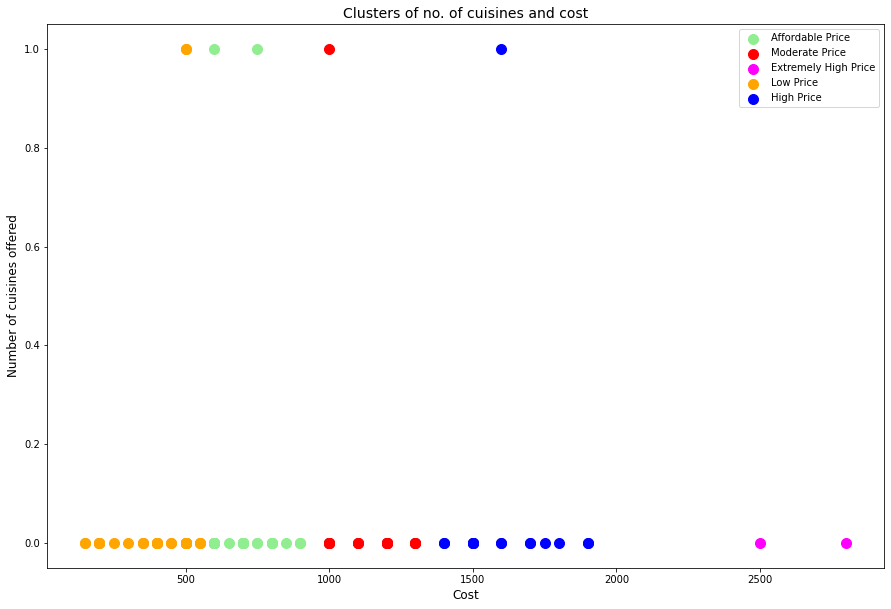

In [ ]:
#setting figure size
plt.figure(figsize=(15, 10))  

#Visualizing the clusters
plt.scatter(x[y_cluster == 0, 1], x[y_cluster == 0, 2], s = 100, c = 'lightgreen', label = 'Affordable Price')
plt.scatter(x[y_cluster == 1, 1], x[y_cluster == 1, 2], s = 100, c = 'red', label = 'Moderate Price')
plt.scatter(x[y_cluster == 2, 1], x[y_cluster == 2, 2], s = 100, c = 'magenta', label = 'Extremely High Price')
plt.scatter(x[y_cluster == 3, 1], x[y_cluster == 3, 2], s = 100, c = 'orange', label = 'Low Price')
plt.scatter(x[y_cluster == 4, 1], x[y_cluster == 4, 2], s = 100, c = 'blue', label = 'High Price')

#To display x label, y label, and the title
plt.title('Clusters of no. of cuisines and cost', fontsize = 14)
plt.xlabel('Cost', fontsize = 12)
plt.ylabel('Number of cuisines offered', fontsize = 12)
plt.legend()
plt.show()

Inference:

1. From the above cluster distribution, only restaurants with 4 and 5 cuisines offered have all range of price.

According to my hypothesis:

1. Cuisines with a low and affordable cost are in more demand.

In [ ]:
#unique clusters with its count
np.unique(y_cluster,return_counts=True)
print(f"Unique clusters are {list(np.unique(y_cluster,return_counts=True)[0])}.")
print(f"Count of unique clusters are {list(np.unique(y_cluster,return_counts=True)[1])}.")

Unique clusters are [0, 1, 2, 3, 4].
Count of unique clusters are [31, 20, 2, 36, 16].


Clusters with labels 2 and 3 are having the least and most values, respectively.

In [ ]:
#labels of cluster
X['labels'] = y_cluster

In [ ]:
#Cluster with label 2
X[X['labels'] == 2]

,Name,Cost,American,Andhra,Arabian,Asian,BBQ,Bakery,Beverages,Biryani,Burger,Cafe,Chinese,Continental,Desserts,European,FastFood,FingerFood,Goan,HealthyFood,Hyderabadi,IceCream,Indonesian,Italian,Japanese,Juices,Kebab,Lebanese,Malaysian,Mediterranean,Mexican,Mithai,ModernIndian,Momos,Mughlai,NorthEastern,NorthIndian,Pizza,Salad,Seafood,SouthIndian,Spanish,StreetFood,Sushi,Thai,Wraps,labels
56,Feast - Sheraton Hyderabad Hotel,2500.0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,2
92,Collage - Hyatt Hyderabad Gachibowli,2800.0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,2


In [ ]:
#Cluster with label 3
X[X['labels'] == 3].head()

,Name,Cost,American,Andhra,Arabian,Asian,BBQ,Bakery,Beverages,Biryani,Burger,Cafe,Chinese,Continental,Desserts,European,FastFood,FingerFood,Goan,HealthyFood,Hyderabadi,IceCream,Indonesian,Italian,Japanese,Juices,Kebab,Lebanese,Malaysian,Mediterranean,Mexican,Mithai,ModernIndian,Momos,Mughlai,NorthEastern,NorthIndian,Pizza,Salad,Seafood,SouthIndian,Spanish,StreetFood,Sushi,Thai,Wraps,labels
6,eat.fit,500.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,3
7,Shah Ghouse Spl Shawarma,300.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3
9,Cream Stone,350.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3
10,Sardarji's Chaats & More,400.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,3
15,KFC,500.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3


# Sentiment Analysis

### Text Pre Processing

In [ ]:
#Displays the first five row of Review and Rating column
zomato_df[['Review', 'Rating']].head()

,Review,Rating
0,"The ambience was good, food was quite good . h...",5.0
1,Ambience is too good for a pleasant evening. S...,5.0
2,A must try.. great food great ambience. Thnx f...,5.0
3,Soumen das and Arun was a great guy. Only beca...,5.0
4,Food is good.we ordered Kodi drumsticks and ba...,5.0


In [ ]:
#Displays the last five row of Review and Rating column
zomato_df[['Review', 'Rating']].tail()

,Review,Rating
9950,Madhumathi Mahajan Well to start with nice cou...,3.0
9951,This place has never disappointed us.. The foo...,4.5
9952,"Bad rating is mainly because of ""Chicken Bone ...",1.5
9953,I personally love and prefer Chinese Food. Had...,4.0
9954,Checked in here to try some delicious chinese ...,3.5


In [ ]:
#creating a function to remove the punctuation
def remove_punctuation(text):
    '''It removes the punctuation from the given string.
    '''
    
    return text.translate(str.maketrans('', '', string.punctuation))

In [ ]:
#assigning a variable to the stopwords
stop_words = ["'s","ve", "i", "me", "my", "myself", "we", "our", "ours", 
              "ourselves", "you","it", "its", "it's", "itself", "don", "should",
              "your", "yours", "yourself", "yourselves", "he", "him", "his", 
              "himself", "she", "her", "hers", "herself", "they", "them", "now",
              "their", "theirs", "themselves", "what", "which", "who", "whom",
              "this", "that", "these", "those", "am", "is", "are", "was",
              "were", "be", "been", "being", "have", "has", "had", "having",
              "do", "does", "did", "doing", "a", "an", "the", "and", "but",
              "if", "or", "because", "as", "until", "while", "of", "at", "by",
              "for", "with", "about", "against", "between", "into", "through",
              "during", "before", "after", "above", "below", "to", "from", 
              "up", "down", "in", "out", "on", "off", "over", "under", "again",
              "further", "then", "once", "here", "there", "when", "where", 
              "why", "how", "all", "any", "both", "each", "few", "more", "most",
              "other", "some", "such",  "only", "own", "same", "so", "than", 
              "too", "very", "s", "t", "can", "will", "just"]

#creating a function to remove the stopwords
def remove_stopwords(text):
    '''It removes stopwords from the given string.
    '''
    
    return " ".join([word for word in text.split() if word not in stop_words])

In [ ]:
#creating a function to remove the urls if any
def remove_urls(text):
    '''It removes urls from the given string.
    '''
    
    url = re.compile(r'https?://\S+|www\.\S+') 
    
    return url.sub(r'', text)

In [ ]:
#creating a function to remove the html tags if any
def remove_html(text):
    '''It remove html tags from the given string.
    '''
    
    html = re.compile(r'<.*?>')
    
    return html.sub(r'', text)

In [ ]:
#creating a function to remove the emoji patterns
def remove_emojis(text):
    '''It remove emoji patterns from the given string.
    '''
    
    emojis = re.compile(
                        "["
                        u"\U0001F600-\U0001F64F"  # emoticons
                        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                        u"\U0001F680-\U0001F6FF"  # transport & map symbols
                        u"\U0001F1E0-\U0001F1FF"  # flags 
                        u"\U00002702-\U000027B0"
                        u"\U000024C2-\U0001F251"
                        u"\U0001f926-\U0001f937"
                        u"\U00010000-\U0010ffff"
                        u"\u2640-\u2642" 
                        u"\u2600-\u2B55"
                        u"\u200d"
                        u"\u23cf"
                        u"\u23e9"
                        u"\u231a"
                        u"\ufe0f"  # dingbats
                        u"\u3030"
                        "]+", flags = re.UNICODE 
                      ) 
    
    return emojis.sub(r'', text)

In [ ]:
#creating a function to clean the text data

def clean_all(data):
    '''Takes the text data and return it after assuring the data-type, 
    lower casing it, removing punctuation, stopwords, urls, html tags,
    and emoji patterns.
    '''
    
    #make sure about the correct data type
    data = data.astype(str) 

    #lower casing
    data = data.str.lower()
    
    #list of functions to be performed
    remove = [remove_punctuation, remove_stopwords, remove_urls, 
              remove_html, remove_emojis]

    #remove punctuation, stopwords, urls, html tags, and emoji patterns
    for rem in remove:
        data = data.apply(rem)

    return data

In [ ]:
#creating a column of clean reviews
zomato_df['review'] = clean_all(zomato_df['Review'])

In [ ]:
#creating a binary column of 'good_reviews'
zomato_df["good_reviews"] = zomato_df["Rating"].apply(lambda score: 1 if score >= 4 else 0)

In [ ]:
#creating column for polarity and subjectivity of review
zomato_df['polarity'] = zomato_df['review'].apply(lambda x: TextBlob(x).sentiment.polarity).round(2)
zomato_df['subjectivity'] = zomato_df['review'].apply(lambda x: TextBlob(x).sentiment.subjectivity).round(2)

In [ ]:
#Displays the first five rows of the dataset
zomato_df[['Review', 'review', 'Rating', 'good_reviews', 'polarity', 'subjectivity']].head()

,Review,review,Rating,good_reviews,polarity,subjectivity
0,"The ambience was good, food was quite good . h...",ambience good food quite good saturday lunch c...,5.0,1,0.66,0.72
1,Ambience is too good for a pleasant evening. S...,ambience good pleasant evening service prompt ...,5.0,1,0.71,0.69
2,A must try.. great food great ambience. Thnx f...,must try great food great ambience thnx servic...,5.0,1,0.55,0.68
3,Soumen das and Arun was a great guy. Only beca...,soumen das arun great guy behavior sincerety g...,5.0,1,0.75,0.68
4,Food is good.we ordered Kodi drumsticks and ba...,food goodwe ordered kodi drumsticks basket mut...,5.0,1,0.52,0.52


In [ ]:
#Displays the last five rows of the dataset
zomato_df[['Review', 'review', 'Rating', 'good_reviews', 'polarity', 'subjectivity']].tail()

,Review,review,Rating,good_reviews,polarity,subjectivity
9950,Madhumathi Mahajan Well to start with nice cou...,madhumathi mahajan well start nice courteous s...,3.0,0,0.31,0.64
9951,This place has never disappointed us.. The foo...,place never disappointed us food courteous sta...,4.5,1,0.17,0.71
9952,"Bad rating is mainly because of ""Chicken Bone ...",bad rating mainly chicken bone found veg food ...,1.5,0,0.12,0.51
9953,I personally love and prefer Chinese Food. Had...,personally love prefer chinese food couple tim...,4.0,1,0.41,0.62
9954,Checked in here to try some delicious chinese ...,checked try delicious chinese food seen nonveg...,3.5,0,0.10,0.63


In [ ]:
#creating an empty dataframe to store mean polarity and subjectivity values
good_review_df = pd.DataFrame()

#storing mean polarity and subjectivity values in good_review_df
for i in range(2):
    good_review_df.loc[i, 'polarity'] = zomato_df.loc[zomato_df['good_reviews'] == i].polarity.mean()
    good_review_df.loc[i, 'subjectivity'] = zomato_df.loc[zomato_df['good_reviews'] == i].subjectivity.mean()

#displaying good_review_df
good_review_df

,polarity,subjectivity
0,-0.065722,0.53389
1,0.419158,0.60668


In [ ]:
#creating a column for feedback with good and bad reviews 
good_review_df['feedback'] = good_review_df.index
good_review_df['feedback'] = good_review_df.feedback.map({0 : 'Bad Reviews',
                                                          1 : 'Good Reviews'})

#displaying good_review_df
good_review_df

,polarity,subjectivity,feedback
0,-0.065722,0.53389,Bad Reviews
1,0.419158,0.60668,Good Reviews


### Sentiment Analysis with Subjectivity and Polarity

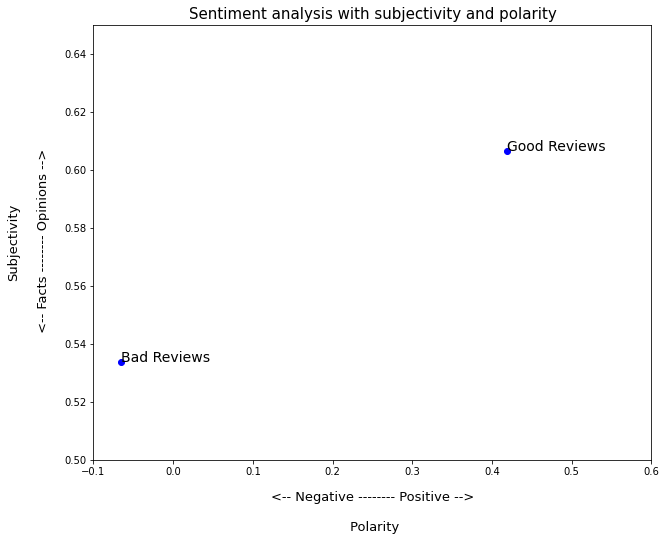

In [ ]:
#setting figure size
plt.figure(figsize=(10, 8))  

#text with scatter plot to display sentiment analysis with subjectivity and polarity
for index in good_review_df.index:
    x = good_review_df['polarity'].loc[index]
    y = good_review_df['subjectivity'].loc[index]
    plt.scatter(x, y, color = 'blue')
    plt.text(x, y, s = good_review_df['feedback'][index], fontsize = 14)
    plt.xlim(-0.1, 0.6)
    plt.ylim(0.5, 0.65)

#To display the x label, y label and title of the line chart
plt.xlabel('<-- Negative -------- Positive -->\n \n Polarity', labelpad=14, fontsize=13)
plt.ylabel('Subjectivity\n \n <-- Facts -------- Opinions -->', labelpad=14, fontsize=13)
plt.title('Sentiment analysis with subjectivity and polarity', fontsize = 15)
plt.show()

Inference:
1. Good reviews have high polarity and subjectivity both.

According to my hypothesis:
1. Zomato customers are giving both positive and negative statements on their personal opinion.

### Distribution of Polarity Score

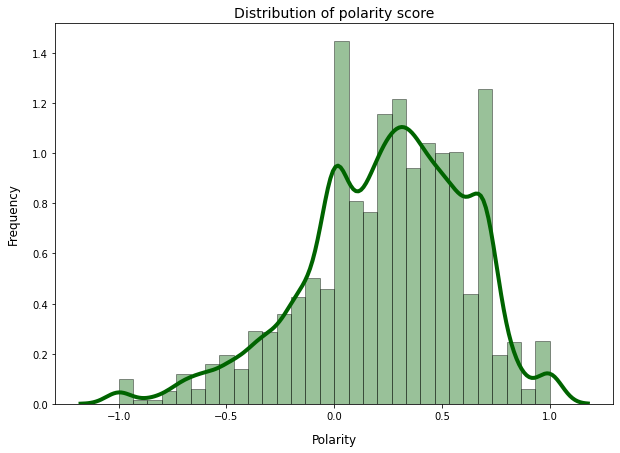

In [ ]:
#setting figure size
plt.figure(figsize=(10, 7))  

#distribution plot to display the distribution of polarity score
sns.distplot(zomato_df['polarity'], hist=True, kde=True, 
             bins=int(30), color = 'darkgreen', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

#To display the x label, y label and title of the distribution plot
plt.xlabel('Polarity', labelpad = 12, fontsize = 12)
plt.ylabel('Frequency', labelpad = 12, fontsize = 12)
plt.title('Distribution of polarity score', fontsize=14)
plt.show()

Inference:
1. Polarity is non-uniformly distributed.

According to my hypothesis:
1. 
The density of positive feedback is more than negative feedback based on polarity distribution.


### Distribution of Polarity w.r.t. Reviews

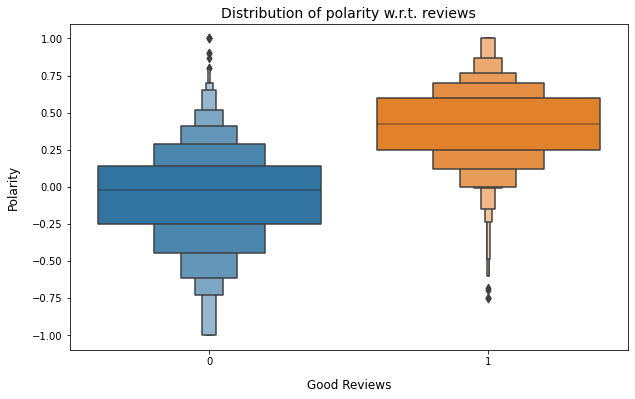

In [ ]:
#setting figure size
plt.figure(figsize=(10, 6))  

#boxenplot to display the distribution of polarity score
sns.boxenplot(x = 'good_reviews', y = 'polarity', data = zomato_df)

#To display the x label, y label and title of the boxenplot
plt.xlabel('Good Reviews', labelpad = 12, fontsize = 12)
plt.ylabel('Polarity', labelpad = 12, fontsize = 12)
plt.title('Distribution of polarity w.r.t. reviews', fontsize=14)
plt.show()

Inference:
1. From the above boxenplot, we can observe that there are bad reviews with high polarity and good reviews with low polarity.

According to my hypothesis:
1. Customers giving positive feedback are not necessarily satisfied with the services offered by zomato restaurants.
2. Similarly, customers giving negative feedback are not necessarily unsatisfied with the services offered by zomato restaurants.


 **Lets Check Them**

In [ ]:
#review is good but rating is bad
zomato_df.loc[((zomato_df.polarity == 1) & (zomato_df.good_reviews == 0))].review.head(10).tolist()

['ordered paneer butter masala paneer quality best gravy not tasty',
 'food awesome delivered food 130 hours latewhen called asked replied lot ordersthis not farewe waited almost 90mins 20mins delivery',
 'excellent food always given plastic cutlery even though specifically request not provided']

### Distribution of Subjectivity Score

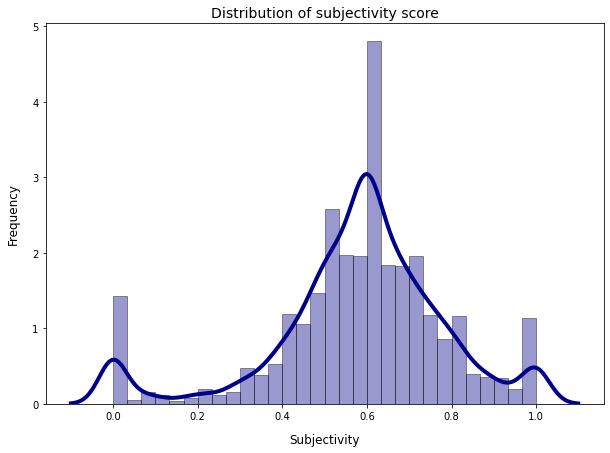

In [ ]:
#setting figure size
plt.figure(figsize=(10, 7))  

#distribution plot to display the distribution of subjectivity score
sns.distplot(zomato_df['subjectivity'], hist=True, kde=True, 
             bins=int(30), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

#To display the x label, y label and title of the distribution plot
plt.xlabel('Subjectivity', labelpad = 12, fontsize = 12)
plt.ylabel('Frequency', labelpad = 12, fontsize = 12)
plt.title('Distribution of subjectivity score', fontsize = 14)
plt.show()

Inference:
1. Subjectivity is non-uniformly distributed.

According to my hypothesis:
1. The density of personal opinions is more than factual information based on subjectivity distribution.

### Distribution of Subjectivity w.r.t. Reviews

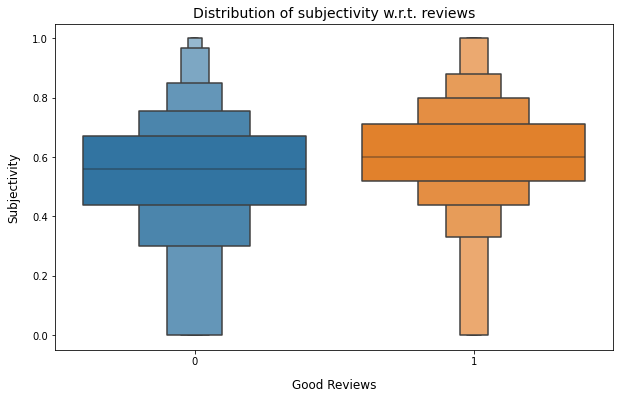

In [ ]:
#setting figure size
plt.figure(figsize=(10, 6))  

#boxenplot to display the distribution of subjectivity score
sns.boxenplot(x = 'good_reviews', y = 'subjectivity', data = zomato_df)

#To display the x label, y label and title of the boxenplot
plt.xlabel('Good Reviews', labelpad = 12, fontsize = 12)
plt.ylabel('Subjectivity', labelpad = 12, fontsize = 12)
plt.title('Distribution of subjectivity w.r.t. reviews', fontsize=14)
plt.show()

Inference:

1. From the above boxenplot, we can observe that the median of good reviews is higher than the median of bad reviews for subjectivity.

According to my hypothesis:

1. Zomato restaurants should improve their services to avoid negative feedback from customers.

### Word Cloud for Positive and Negative Words

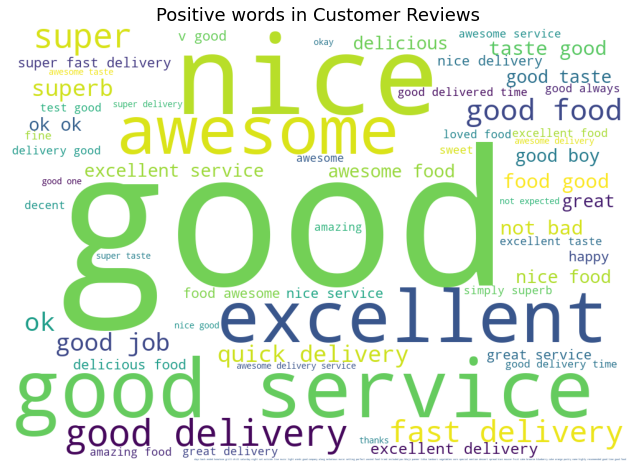

In [ ]:
fig = plt.figure(1,figsize=(12, 8))

#To generate an image that gives us the most representative words 
wordcloud = (WordCloud(width = 1000, height = 700, background_color = 'white', 
                       random_state = 1, prefer_horizontal = 2 
                       ).generate_from_frequencies(
                      zomato_df[zomato_df.polarity > 0].review.value_counts()))

#plot the WordCloud image                        
plt.imshow(wordcloud)
plt.axis('off')

#To display the title of the word cloud
plt.title('Positive words in Customer Reviews', fontsize = 18)
plt.show()

Inference:

1. Most commonly used positive words in customer reviews are "good" and "nice".

According to my hypothesis:

1. Zomato restaurants should improve the services offered to the customers to gain more positive feedback.

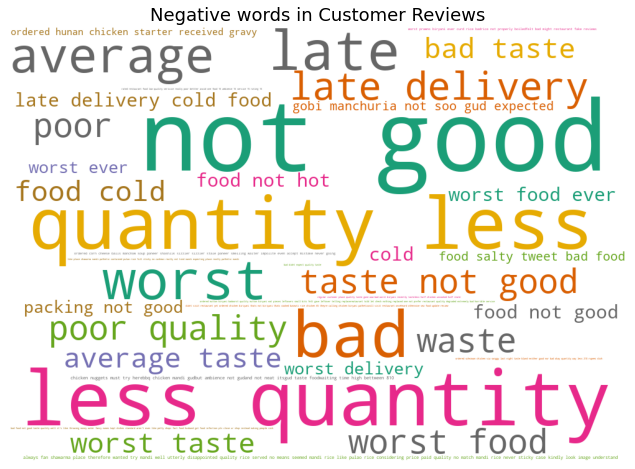

In [ ]:
#setting figure size
fig = plt.figure(1,figsize=(12, 8))

#To generate an image that gives us the most representative words 
wordcloud = (WordCloud(width = 1000, height = 700, background_color = 'white', 
                       random_state = 1, prefer_horizontal = 2, colormap = 'Dark2'
                       ).generate_from_frequencies(
                      zomato_df[zomato_df.polarity < 0].review.value_counts()))

#plot the WordCloud image                        
plt.imshow(wordcloud)
plt.axis('off')

#To display the title of the word cloud
plt.title('Negative words in Customer Reviews', fontsize = 18)
plt.show()

Inference:

1. Most commonly used negative words in customer reviews are "not good" and "less quantity".

According to my hypothesis:

1. Zomato restaurants should focus on improving the quality and quantity of food.

### Relationship of Subjectivity and Polarity with Reviews

<Figure size 720x432 with 0 Axes>

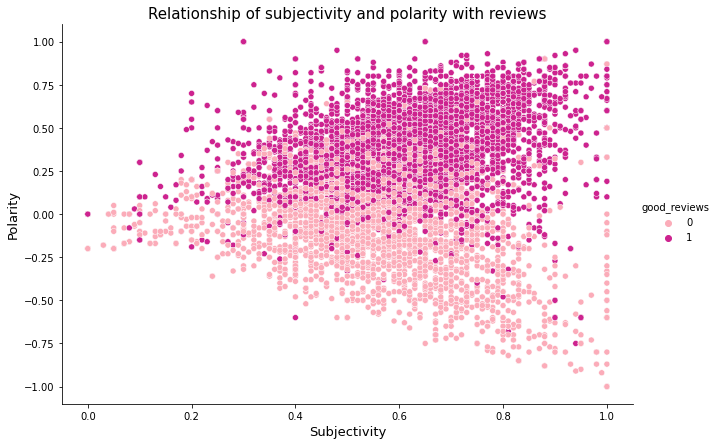

In [ ]:
#setting figure size
plt.figure(figsize=(10,6))

#create relational plot
sns.relplot(x="subjectivity", y="polarity", hue = "good_reviews", alpha = 1 , 
            palette = "RdPu", height = 6, aspect = 1.5, data = zomato_df)

#To display the title, xlabel and ylabel of relational plot
plt.xlabel('Subjectivity', fontsize=13)
plt.ylabel('Polarity', fontsize=13)
plt.title('Relationship of subjectivity and polarity with reviews', fontsize=15)
plt.show()

Inference:
1. Good reviews are more than bad reviews in polarity and subjectivity both.

According to my hypothesis:
1. Zomato restaurants should continue to provide the same service, but with some improvements to avoid bad reviews and gain more good reviews.

# Insights and  Conclusion

Clustering:

1. Using the k-means clustering algorithm following clusters were formed:

   * Clusters of restaurants based on price: From these clusters, we observed that customers prefer zomato restaurants that have a low and affordable estimated cost per person. 

   * Clusters of number of cuisines and cost: From these clusters, we observed that there is more demand for cuisines with low and affordable prices.

Sentiment Analysis:

1. Good reviews are more than bad reviews.

2.  The precision, recall, and f1-score for bad reviews in sentiment analysis of zomato restaurants are 0.89, 0.80, and 0.84, respectively, whereas for good reviews are 0.89, 0.94, and 0.91, respectively.

# Application of Project In Industry

1. For foodies who want to sample the best cuisine from every corner of the globe while staying within their price range, Zomato Analysis is one of the most helpful tools available.

2. This study is also useful for anyone looking for affordable eateries serving different cuisines in different regions of the nation.

3. This study meets the demands of consumers who are looking for the nation's best cuisine and the region with the greatest concentration of restaurants serving it.